# Capstone Project

Team members:

1. Jayant Dabas
2. Rebecca Rinehart
3. Eric Zhao

Eric's N-number: N19057054

In [76]:
# Import packages

import urllib.request

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [77]:
# Seed random generator using Eric's N-number

np.random.seed(19057054)

In [78]:
def load_data(filename):
  col_names = {
    'rmpCapstoneNum.csv': ['avg_rating', 'avg_difficulty', 'num_ratings', 'is_pepper', 'num_repeat', 'num_online', 'is_male', 'is_female'],
    'rmpCapstoneQual.csv': ['major', 'university', 'state'],
    'rmpCapstoneTags.csv': ['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7', 'tag8', 'tag9', 'tag10', 'tag11', 'tag12', 'tag13', 'tag14', 'tag15', 'tag16', 'tag17', 'tag18', 'tag19', 'tag20']
  }
  return pd.read_csv(filename, names=col_names[filename])

df_num  = load_data('rmpCapstoneNum.csv')
df_qual = load_data('rmpCapstoneQual.csv')
df_tags = load_data('rmpCapstoneTags.csv')

In [79]:
display(df_num.head())
display(df_qual.head())
display(df_tags.head())

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


,major,university,state
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# confirm same sample size
print(len(df_num))
print(len(df_qual))
print(len(df_tags))

89893
89893
89893


**Merge dataframes into one**

In [81]:
raw_df = pd.concat([df_num, df_qual, df_tags], axis = 1)
raw_df.head()

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,...,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,...,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,...,0,0,0,0,0,0,0,0,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,...,0,2,1,0,0,0,0,0,1,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,...,0,0,0,0,0,0,0,0,0,0


**Removing professors with less than 3 ratings**

In [82]:
df = raw_df.dropna(subset = ['num_ratings'])
med_num_ratings = np.median(df['num_ratings'])
avg_num_ratings = np.mean(df['num_ratings'])
print('Median number of ratings per professor: ', med_num_ratings)
print('Average number of ratings per professor: ', avg_num_ratings)

for k in [3, 5]:
  k_df = df[df['num_ratings'] >= k]
  size = len(k_df)
  pct_total = size / len(raw_df) * 100
  print(f'Sample size with {k} or more ratings per professor: {size}')
  print(f'Percentage of original sample size: {pct_total:.4f}%')

# filtering for at least 3 ratings
df = df[df['num_ratings'] >= 3]

Median number of ratings per professor:  3.0
Average number of ratings per professor:  5.374721444488887
Sample size with 3 or more ratings per professor: 40528
Percentage of original sample size: 45.0847%
Sample size with 5 or more ratings per professor: 25368
Percentage of original sample size: 28.2202%


We have chosen to filter for (keep) professors with **3 or more ratings**, as it retains as much of the data possible while reducing the amount of professors with extreme ratings (1 or 5 due to receiving only 1 or 2 ratings).

In [83]:
# Assumption: The data represents sex assigned at birth. Therefore is_male, is_female can not be equal.
df = df[df['is_male'] != df['is_female']]

# Drop rows with missing gender info
df = df.dropna(subset=['is_male', 'is_female'])

# Remove rows with missing average difficulty
df = df.dropna(subset=['avg_difficulty'])

## Q5. Is there a gender difference in terms of average difficulty? Again, a significance test is indicated.

**Data Cleaning**

In [88]:
df_5 = df.copy()

# Split the data into male and female ratings
male_difficulty = df_5[df_5['is_male'] == 1]['avg_difficulty']
female_difficulty = df_5[df_5['is_female'] == 1]['avg_difficulty']

# print cleaned statitics
print('Male difficulty: ')
print('Sample size: ', len(male_difficulty))
print(f'Mean: {np.mean(male_difficulty):.4f}')
print(f'Standard deviation: {np.std(male_difficulty):.4f}')
print(f'\n')

print('Male difficulty:')
print('Sample size: ', len(female_difficulty))
print(f'Mean: {np.mean(female_difficulty):.4f}')
print(f'Standard deviation: {np.std(female_difficulty):.4f}')

Male difficulty: 
Sample size:  15801
Mean: 2.8841
Standard deviation: 0.8530


Male difficulty:
Sample size:  13925
Mean: 2.8827
Standard deviation: 0.8509


**Visualization**

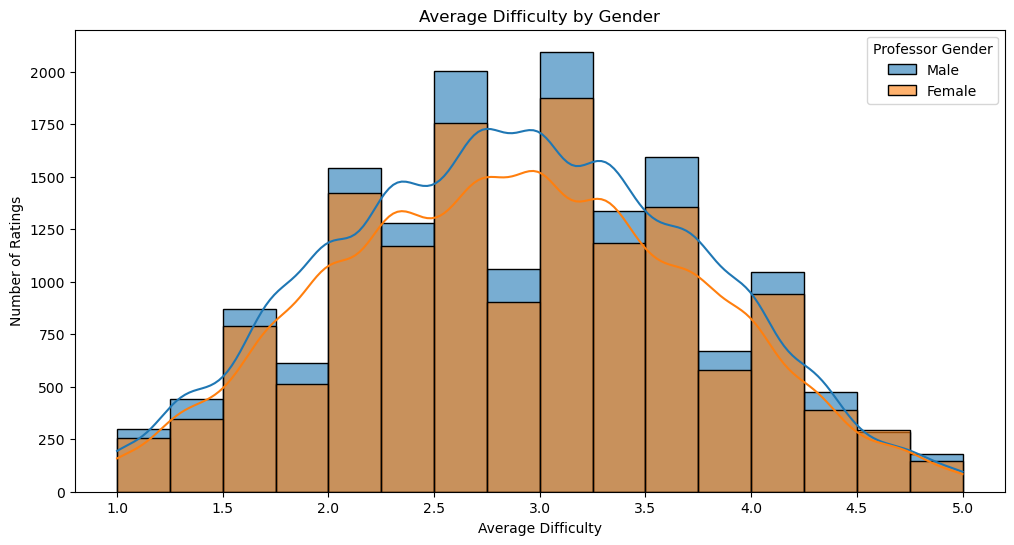

In [85]:
plt.figure(figsize=(12, 6))

sns.histplot(male_difficulty, kde=True, bins=16, alpha=0.6, label='Male')
sns.histplot(female_difficulty, kde=True, bins=16, alpha=0.6, label='Female')

plt.title('Average Difficulty by Gender')
plt.xlabel('Average Difficulty')
plt.ylabel('Number of Ratings')
plt.legend(title='Professor Gender')

plt.show()

**Comparing variances**

Because the data appears to be normally distributed, I could employ an F-test to determine if the variances are different. Here, I will use Levene's test; it is more robust than F-test, as it does not require assumption of normality. F-test is more sensitive to normality violations.

In [86]:
levene_stat, levene_pval = stats.levene(male_difficulty, female_difficulty)

print('Levene\'s test: ')
print(f'Statistic: {levene_stat:.4f}')
print(f'p-value: {levene_pval:.4f}')

Levene's test: 
Statistic: 0.0927
p-value: 0.7607


In [87]:
f_stat, f_pval = stats.f_oneway(male_difficulty, female_difficulty)

print('Levene\'s test: ')
print(f'Statistic: {f_stat:.4f}')
print(f'p-value: {f_pval:.4f}')

Levene's test: 
Statistic: 0.0202
p-value: 0.8871


H0: The average difficulties for male and female professors have equal variances.
H1: The average difficulties for male and female professors have unequal variances.
Because p-value > 0.005, we retain the null hypothesis and conclude that the variances are equal.

**Statistical test**

Because the difficulty score was presented as an average in the original dataset, we are assuming that difficulty can be reduced to its sample mean.

We are comparing 2 sample means, do not know the population parameters, no large inter-individual variability, and similar variances. Therefore, we will use an independent samples t-test.

In [89]:
statistic, pval = stats.ttest_ind(male_difficulty, female_difficulty)
print('t test statistic: ', statistic)
print('p-value: ', pval)
print('p-value < alpha = 0.005?', pval< 0.005)
print('Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.')
print('Conclusion: There is no gender difference in average difficulty.')

t test statistic:  0.14195532904551686
p-value:  0.8871162526038965
p-value < alpha = 0.005? False
Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.
Conclusion: There is no gender difference in average difficulty.


## Q6. Please quantify the likely size of this effect at 95% confidence.

**Calculate effect size (Cohen's d) with 95% confidence intervals**

In [91]:
mean_male = np.mean(male_difficulty)
std_male = np.std(male_difficulty)

mean_female = np.mean(female_difficulty)
std_female = np.std(female_difficulty)

numerator = abs(mean_male - mean_female)
denominator = np.sqrt((std_male**2 + std_female**2) / 2) # pooled sd
d = numerator/denominator

print(f'Effect size (Cohen\'s d): {d:.6f}')

Effect size (Cohen's d): 0.001650


In [92]:
confidence = 0.95 #confidence level at 95%
size_male = len(male_difficulty)
size_female = len(female_difficulty)

# calculate standard error of d
se = np.sqrt((size_male + size_female)/(size_male * size_female) + d**2/(2*(size_male + size_female)))

# calculate z score and confidence intervals
z_score = stats.norm.ppf((1 + confidence) / 2)
lower_cb = d - z_score * se
upper_cb = d + z_score * se

print(f'95% confidence interval: [{lower_cb:.5f}, {upper_cb:.5f}]')

95% confidence interval: [-0.02113, 0.02443]


Findings: We estimate the effect size to be 0.001650 with 95% confidence that the true effect lies in the interval of [-0.02113, 0.02443].

Interpretation: With an effect size this small, the distribution of average difficulty between male and female professors nearly overlaps. The average difference in average difficulty is 0.165% of a standard deviation.

**Visualization**

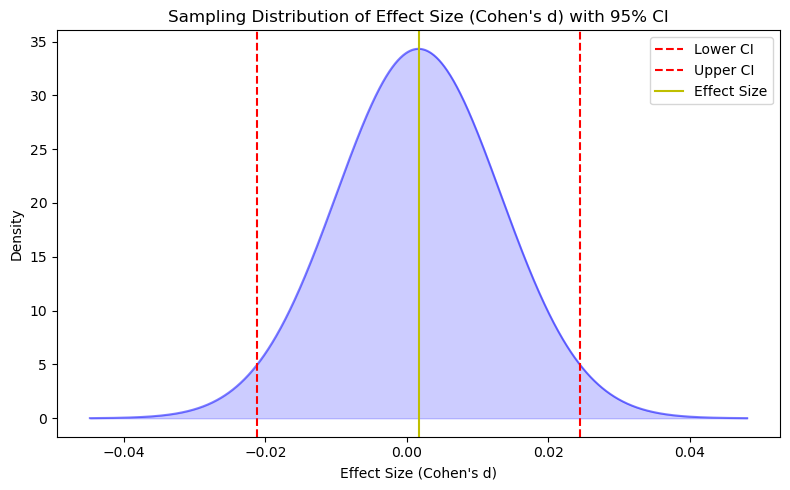

In [93]:
# Create the plot
plt.figure(figsize=(8, 5))

x = np.linspace(d - 4*se, d + 4*se, 1000)
y = stats.norm.pdf(x, d, se)

plt.plot(x, y, color = 'b', alpha = 0.5)
plt.fill_between(x, y, alpha = 0.2, color = 'b')

plt.axvline(lower_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Lower CI')
plt.axvline(upper_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Upper CI')
plt.axvline(d, color = 'y', linestyle = 'solid', linewidth = 1.5, label = 'Effect Size')

plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Density')
plt.title('Sampling Distribution of Effect Size (Cohen\'s d) with 95% CI')

plt.legend()
plt.tight_layout()
plt.show()

## Q8. Build a regression model predicting average ratings from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns. Also comment on how this model compares to the previous one.

**Dataframe joining and cleaning**

In [96]:
tag_cols = []
for tag in df_tags.columns:
    tag_cols.append(tag)

df_8 = pd.concat([df['avg_rating'], df[tag_cols]], axis = 1)
df_8

,avg_rating,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9,...,tag11,tag12,tag13,tag14,tag15,tag16,tag17,tag18,tag19,tag20
2,3.2,2,1,2,1,0,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.5,8,13,1,3,2,3,2,1,0,...,0,7,3,0,0,0,3,0,1,3
18,4.2,0,2,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21,2.6,4,3,0,0,2,0,1,1,0,...,0,0,0,0,0,1,1,0,5,1
22,3.7,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,4.4,4,1,1,0,1,5,3,0,0,...,0,3,3,3,1,4,2,3,0,1
89868,3.8,1,2,1,0,0,0,0,1,0,...,0,0,1,0,0,0,2,3,1,4
89877,3.6,3,0,1,0,0,1,6,1,1,...,0,1,2,2,0,1,3,0,0,1
89885,3.9,2,0,0,3,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0


**Normalize tag numbers**

To account for professors with numbers of ratings, we will normalize by calculating the proportion of that professor's ratings per tag, rather than using the raw number of ratings.

In [ ]:
df_8 = 

plan
* normalize based on proportion of ratings for that professor
*
* ridge regression (regularization) with CV


**Check for high sparsity tags**

In [95]:
tags_df = df_8.iloc[:,1:]

print('Proportion of professors without each tag')
for col in tags_df.columns:
  no_tag = tags_df[tags_df[col] == 0]
  print(f'{col}: {(len(no_tag) / len(tags_df)*100):.2f}%')


Proportion of professors without each tag
tag1: 49.34%
tag2: 30.65%
tag3: 45.42%
tag4: 54.52%
tag5: 43.83%
tag6: 48.63%
tag7: 55.15%
tag8: 61.14%
tag9: 86.66%
tag10: 69.42%
tag11: 85.23%
tag12: 48.85%
tag13: 61.29%
tag14: 85.46%
tag15: 83.63%
tag16: 60.31%
tag17: 37.36%
tag18: 67.83%
tag19: 80.48%
tag20: 64.19%


## Q10. Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalance concerns.